In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
x = df['Alcohol'].values.reshape(-1,1)
x

array([[0.01],
       [0.01],
       [0.01],
       ...,
       [4.43],
       [1.72],
       [1.68]])

In [ ]:
y = df.iloc[:,3:4].values.reshape(-1,1)
y

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [ ]:
import seaborn as sns
sns.pairplot(x,y)

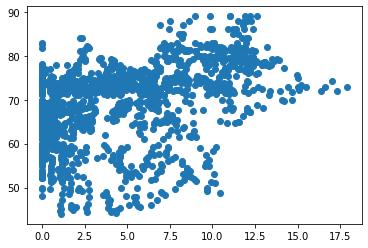

In [ ]:
plt.scatter(x,y)

In [ ]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.15770839224615774

In [ ]:
 from sklearn.linear_model import SGDRegressor

In [ ]:
sgd = SGDRegressor()

In [ ]:
sgd.fit(X_train,y_train)

C:\Users\MSCIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor()

In [ ]:
y_pred1 = sgd.predict(X_test)
r2_score(y_test,y_pred1)

0.15314022292846718

In [ ]:
poly = PolynomialFeatures(degree=2,include_bias=False)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
polylr = LinearRegression()

In [ ]:
polylr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
ypred = polylr.predict(X_test_trans)
r2_score(y_test,ypred)

0.15678327943243608